In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

In [3]:
covid_df.head()

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
UID,,,,,,,,,,,,,,,,,,,,,
84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


In [4]:
# Overall instructions:
# As described in the homework description, each graphic you make must:
#    1. Have a thoughtful title
#    2. Have clearly labelled axes 
#    3. Be legible
#    4. Not be a pie chart
# I should be able to run your .py file and recreate the graphics without error.
# As per usual, any helper variables or columns you create should be thoughtfully named.

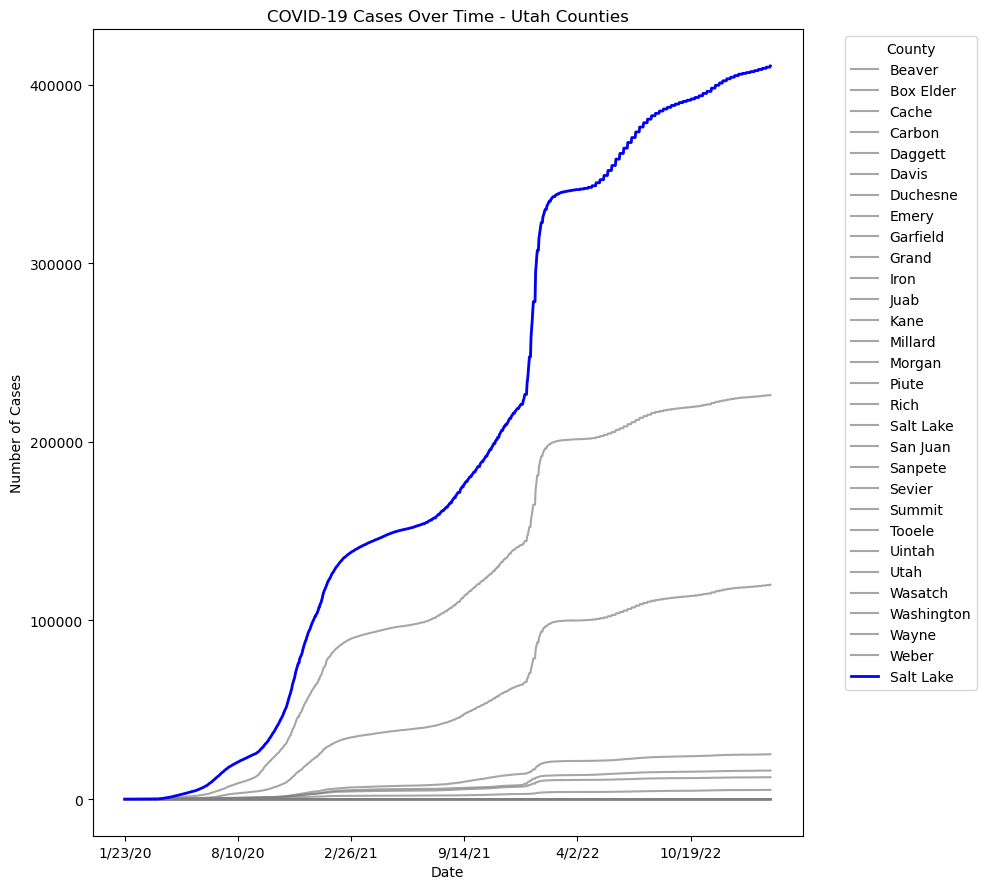

In [5]:
#Visualization 1
# Create a visualization that shows all of the counties in Utah as a time series,
# similar to the one shown in slide 22 during the lecture. The graphic should
# -Show cases over time
# -Have all counties plotted in a background color (something like grey)
# -Have a single county plotted in a contrasting color (something not grey)
# -Have well formatted dates as the X axis

#Getting utah county data
utah_counties = ["Beaver", "Box Elder", "Cache", "Carbon", "Daggett", "Davis", "Duchesne", "Emery", "Garfield", "Grand",
                 "Iron", "Juab", "Kane", "Millard", "Morgan", "Piute", "Rich", "Salt Lake", "San Juan", "Sanpete",
                 "Sevier", "Summit", "Tooele", "Uintah", "Utah", "Wasatch", "Washington", "Wayne", "Weber"]

#Making a utah counties datadframe
utah_covid_df = covid_df[(covid_df['Province_State'] == 'Utah') & (covid_df['Admin2'].isin(utah_counties))]


utah_time_series = utah_covid_df.iloc[:, 11:]

#Transpose utah data because that's apparently a thing you have to do
#which I spent far too much time being confused about
utah_time_series_transposed = utah_time_series.transpose()

#Renaming UID to county names
utah_time_series_transposed.columns = utah_counties

#Plot
plt.figure(figsize=(10, 9))
utah_time_series_transposed.iloc[:, :].plot(ax=plt.gca(), color='grey', linestyle='-', alpha=0.7)
#Salt Lake as special county
utah_time_series_transposed['Salt Lake'].plot(ax=plt.gca(), color='blue', linestyle='-', linewidth=2)
plt.title('COVID-19 Cases Over Time - Utah Counties')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

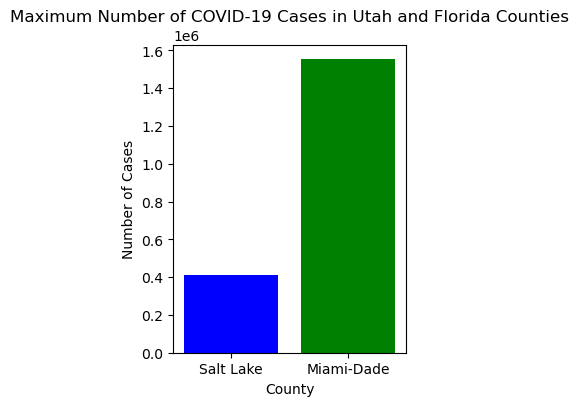

In [6]:
#Visualizaation 2
#Create a visualization that shows the contrast between the county in Utah with
#the most cases to date to a county in Florida with the most cases to date.
#The graphic should:
# -Have only two counties plotted
# -Highlight the difference between the two comparison counties
#You may use any style of graphic you like as long as it is effective (dense) and readable

#Utah counties again
utah_counties = ["Beaver", "Box Elder", "Cache", "Carbon", "Daggett", "Davis", "Duchesne", "Emery", "Garfield", "Grand",
                 "Iron", "Juab", "Kane", "Millard", "Morgan", "Piute", "Rich", "Salt Lake", "San Juan", "Sanpete",
                 "Sevier", "Summit", "Tooele", "Uintah", "Utah", "Wasatch", "Washington", "Wayne", "Weber"]

#Utah data again
utah_covid_df = covid_df[(covid_df['Province_State'] == 'Utah') & (covid_df['Admin2'].isin(utah_counties))]

# Florida counties data
florida_covid_df = covid_df[covid_df['Province_State'] == 'Florida']

#County with highest cases, Utah
utah_max_cases_county = utah_covid_df.loc[utah_covid_df.iloc[:, 11:].max(axis=1).idxmax()]

#County in Florida with most cases
florida_max_cases_county = florida_covid_df.loc[florida_covid_df.iloc[:, 11:].max(axis=1).idxmax()]

# Plot
plt.figure(figsize=(3, 4))
plt.bar(['Salt Lake', 'Miami-Dade'], [utah_max_cases_county.iloc[11:].max(), florida_max_cases_county.iloc[11:].max()], color=['blue', 'green'])
plt.title('Maximum Number of COVID-19 Cases in Utah and Florida Counties')
plt.xlabel('County')
plt.ylabel('Number of Cases')
plt.show()

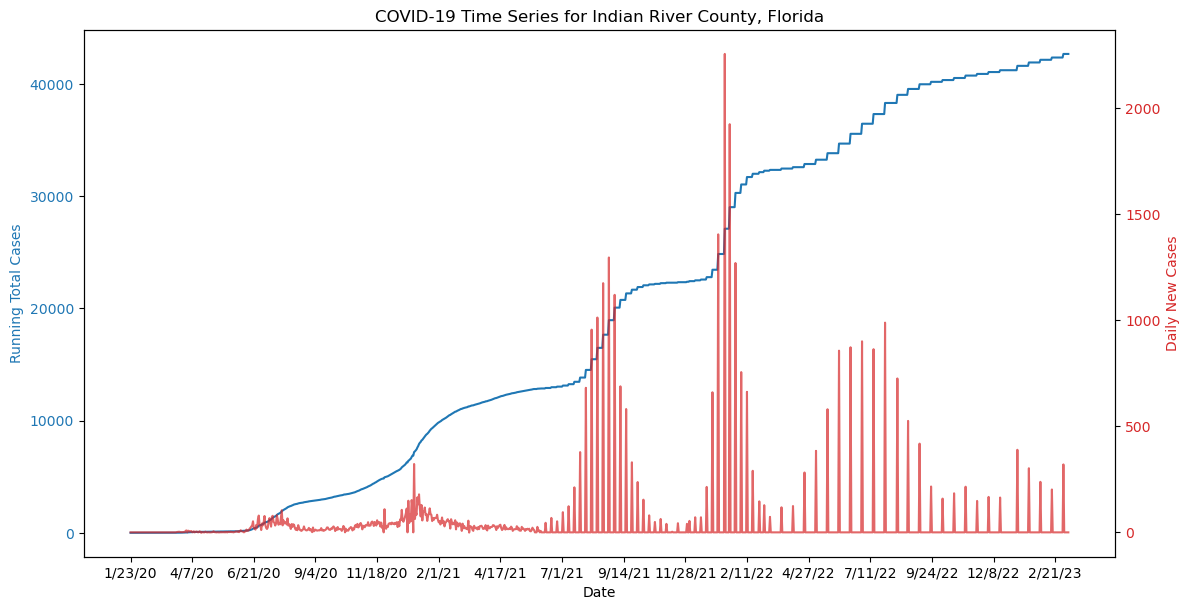

In [7]:
#Visualization 3
#Create a visualization that shows BOTH the running total of cases for a single county AND the daily new cases.
#The graphic should:
# -Use two y-axes (https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)
# -Use color to contrast the two series being plotted
# -Have well formatted dates as the X axis

#Data from Indian River County, Florida, which is where I mostly grew up, never live there.  Florida sucks
indian_river_data = covid_df[(covid_df['Province_State'] == 'Florida') & (covid_df['Admin2'] == 'Indian River')]

#Time series df
indian_river_time_series = indian_river_data.iloc[:, 11:]  # Assuming columns from 11th index onward are date columns

#Total number of cases
running_total = indian_river_time_series.sum(axis=0)

#Gettin the daily new cases
daily_new_cases = indian_river_time_series.diff(axis=1).fillna(0)

#Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

#Plot running total on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Running Total Cases', color=color)
ax1.plot(running_total.index, running_total.values, color=color, label='Running Total Cases')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(ax1.get_xticks()[::75])

#Second y-axis for daily new cases
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Daily New Cases', color=color)
ax2.plot(daily_new_cases.columns, daily_new_cases.iloc[0].values, color=color, alpha=0.7, label='Daily New Cases')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('COVID-19 Time Series for Indian River County, Florida')
plt.show()

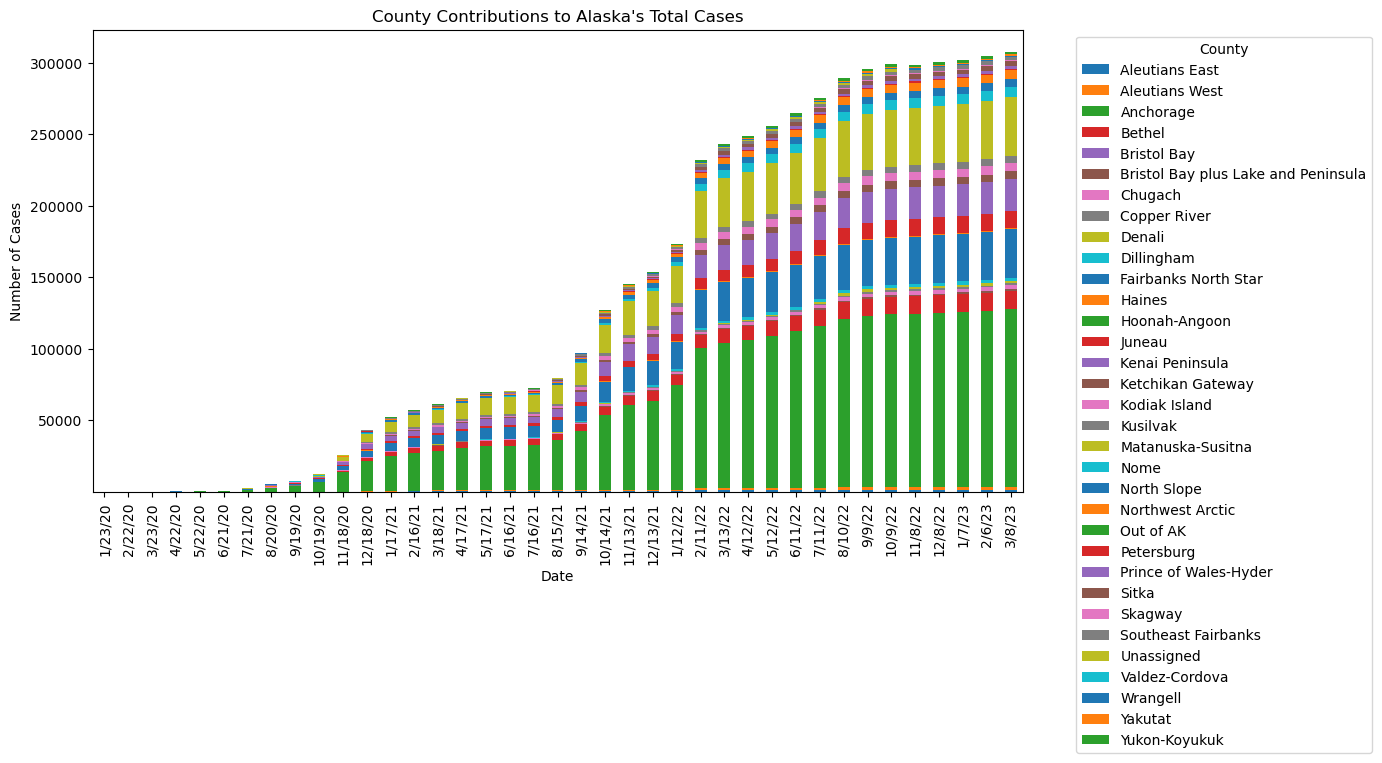

In [23]:
#Visualization 4
#Create a visualization that shows a stacked bar chart of county contributions to a given state's total cases.
#You may choose any state (or states).
#The graphic should:
# -Have a single column delineate a state
# -Have each 'slice' or column compontent represent a county

#Alaskan counties because trying to run through states with more counties was hurting my computer
alaska_data = covid_df[(covid_df['Province_State'] == 'Alaska')]

#Similar stuff as before, getting just the dates
alaska_time_series = alaska_data.iloc[:, 11:]

#Picking every 30th date so the graph is easy to read
selected_dates = alaska_time_series.iloc[:, ::30]

#transposing so it looks better
alaska_time_series_transposed = selected_dates.transpose()

#the plot thickens . . . get it?
fig, ax = plt.subplots(figsize=(12, 6))

#stacking the county data for each day
alaska_time_series_transposed.plot(kind='bar', stacked=True, ax=ax)
plt.title("County Contributions to Alaska's Total Cases")
plt.xlabel('Date')
plt.ylabel('Number of Cases')

#swtiching UID to county name
county_names = alaska_data['Admin2'].unique()
plt.legend(labels=county_names, title='County', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

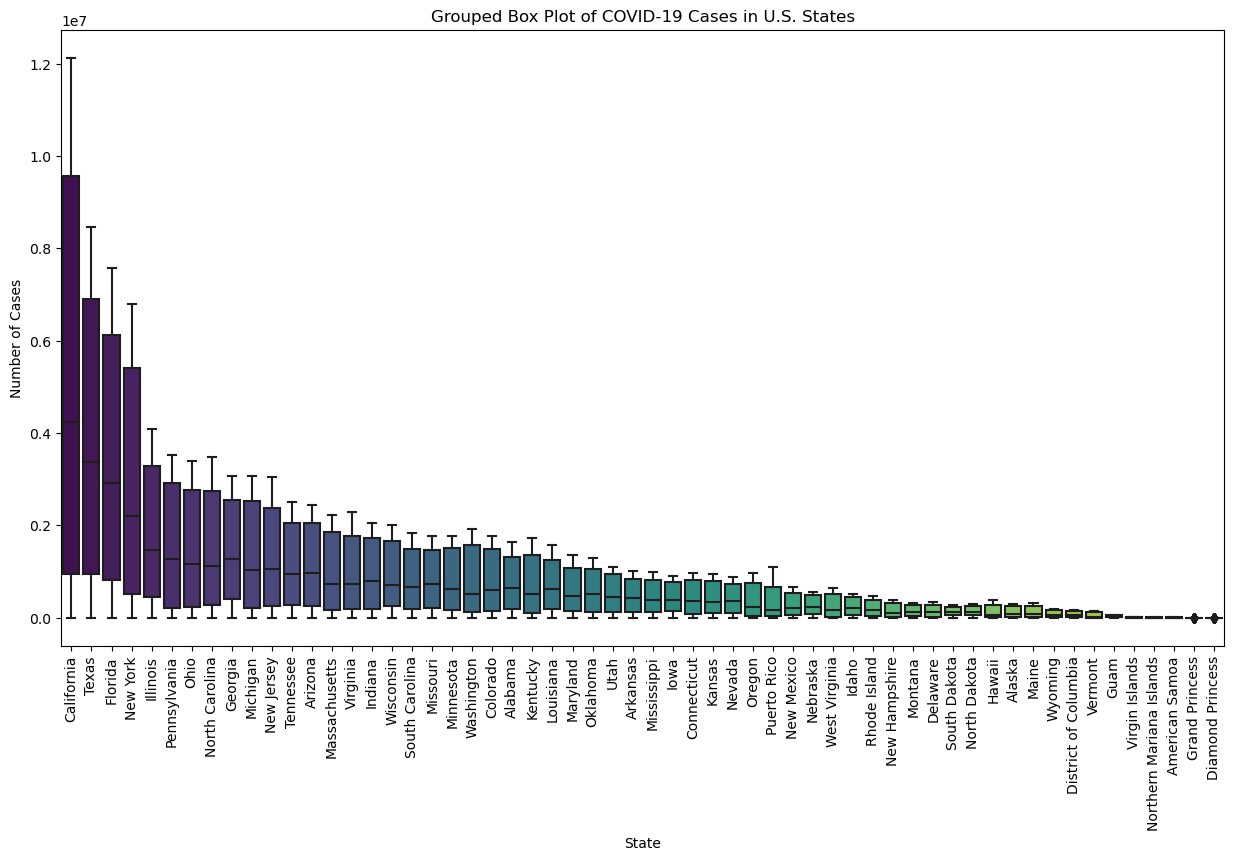

In [27]:
#Extra Credit (5 points)
#Use Seaborn to create a grouped box plot of all reported states. Each boxplot should be a distinct state.
#Have the states ordered from most cases (FL) to fewest cases.

#Gettin the states together and summing up the totals
state_data = covid_df.groupby('Province_State').sum().iloc[:, 10:]

#ordering states by most to fewest cases
ordered_states = state_data.sum(axis=1).sort_values(ascending=False).index

#shaping data for seaborn
state_data_long = state_data.loc[ordered_states].stack().reset_index()
state_data_long.columns = ['State', 'Date', 'Cases']

#Plot shtuff
plt.figure(figsize=(15, 8))
sns.boxplot(x='State', y='Cases', data=state_data_long, palette='viridis')
plt.xticks(rotation=90)
plt.title('Grouped Box Plot of COVID-19 Cases in U.S. States')
plt.xlabel('State')
plt.ylabel('Number of Cases')
plt.show()